In [1]:
from datasets import list_datasets

In [2]:
#iterate the datasets
all_datasets = list_datasets()
print(f"there are{len(all_datasets)} datasets currently available on the hub")
print(f"The first 10 are: {all_datasets[:10]}")

C:\Users\hp\AppData\Local\Temp\ipykernel_11248\1852455507.py:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


there are74131 datasets currently available on the hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [3]:
#Load emotion dataset
from datasets import load_dataset
emotions = load_dataset("emotion")

In [4]:
#look through the dataset; sizes and rows
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
#the huggingface datasets behave like arrays therefore
train_ds[99]

{'text': 'i say goodbye to the fam theyre all sad a crying and i feel like a heartless bitch because hey im pretty excited to be flying for the first time and you know also to spend a year in another country',
 'label': 3}

In [7]:
train_ds.column_names

['text', 'label']

In [8]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [9]:
#covert huggingface datasets
import pandas as pd

In [10]:
emotions.set_format(type="pandas")
df = emotions["train"][:]


In [11]:
df.head(100)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
95,i feel like throwing away the shitty piece of ...,0
96,im starting to feel wryly amused at the banal ...,1
97,i find every body beautiful and only want peop...,1
98,i hear are owners who feel victimized by their...,0


In [12]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)
df["label_name"] = df["label"].apply(label_int2str)

In [13]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


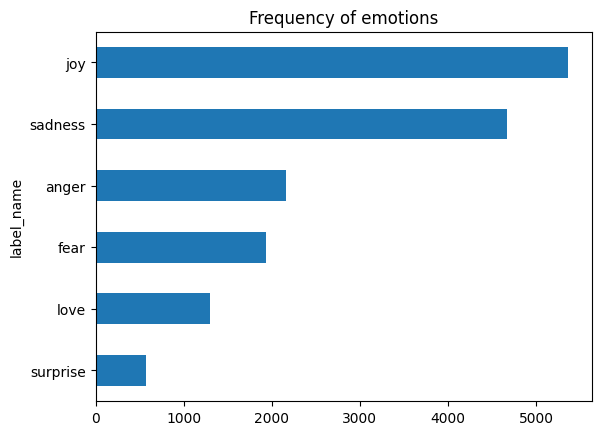

In [14]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of emotions")
plt.show()

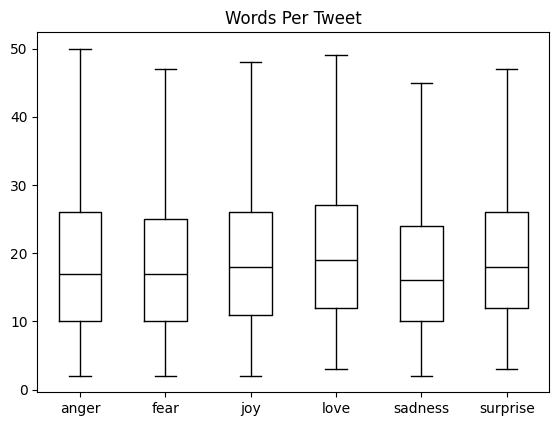

In [15]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet",by="label_name",grid=False,showfliers=False,color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [16]:
#reset out output into suitable formats for huggingface transformer
emotions.reset_format()

In [17]:
#word tokenizer
text = "TOkenized text is a core task in NLP."
tokenized_text = text.split()
print(tokenized_text)

['TOkenized', 'text', 'is', 'a', 'core', 'task', 'in', 'NLP.']


In [18]:
from transformers import AutoTokenizer

In [19]:
#subword tokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [20]:
from transformers import DistilBertTokenizer

In [21]:
distiltokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [22]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 3550, 3793, 2003, 1037, 4563, 4708, 1999, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [23]:
#convert the Inout_ids to tokens
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##ized', 'text', 'is', 'a', 'core', 'task', 'in', 'nl', '##p', '.', '[SEP]']


In [24]:
#convert tokens to string
str_tok = tokenizer.convert_tokens_to_string(tokens)
print(str_tok)

[CLS] tokenized text is a core task in nlp. [SEP]


In [25]:
#vocabulary szie
tokenizer.vocab_size

30522

In [26]:
#maximum content size to show the maximum length of the pretrained model
tokenizer.model_max_length

512

In [27]:
#retrieve names of fields
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [28]:
def tokenize(batch):
    return tokenizer(batch["text"],padding=True,truncation=True)
tokenize_dataset = tokenize(emotions["train"][:2])
print(tokenize_dataset)

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [29]:
emotions_encoded = emotions.map(tokenize,batched=True,batch_size=None)
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [30]:
import torch

In [31]:
#for auto class we use the automodel module
#thus if coverts the token to embeddings then feeds to encoder
from transformers import AutoModel

In [32]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda"if torch.cuda.is_available() else"cpu")#check if gpu is available
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [33]:
#convert the strings and token to pytorch tensors
text = "let me test this brother"
inputs =tokenizer(text,return_tensors="pt")
print(f"tensor shape {inputs['input_ids'].size()}")

tensor shape torch.Size([1, 7])


In [34]:
#place the token on the device
inputs = {k:v.to(device) for k,v in inputs.items()}
#we will use the no_grad function to halt automatic gradient calculations
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[ 0.0235, -0.0531, -0.0151,  ..., -0.0388,  0.2759,  0.2580],
         [ 0.9446,  0.1344,  0.2320,  ...,  0.3375,  0.3564, -0.0776],
         [ 0.2091,  0.0070, -0.3586,  ...,  0.1651,  0.1514,  0.4039],
         ...,
         [-0.3219,  0.0938,  0.3308,  ..., -0.3387,  0.3960, -0.0961],
         [ 0.0632, -0.3498, -0.2433,  ...,  0.1949,  0.2435,  0.0024],
         [ 1.0628,  0.2058, -0.2289,  ..., -0.0481, -0.5959, -0.3784]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [35]:
outputs.last_hidden_state.size()

torch.Size([1, 7, 768])

In [36]:
import numpy as np

In [37]:
#extract all hidden states in one go by using the map()
def extract_states(batch):
    #place model input into GPU
    inputs={k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    #extract the items
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        #return vector of [CLS] token
    return {"Hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [38]:
#convert columns to torch tensors
emotions_encoded.set_format("torch",columns=["input_ids","attention_mask","label"])

In [39]:
#extract all hidden states across all splits simultaneously
emotion_hidden = emotions_encoded.map(extract_states,batched=True)

In [40]:
emotion_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'Hidden_state']

In [41]:
#now create targets off the hidden states
x_train = np.array(emotion_hidden["train"]["Hidden_state"])
x_valid = np.array(emotion_hidden["validation"]["Hidden_state"])
y_train = np.array(emotion_hidden["train"]["label"])
y_valid = np.array(emotion_hidden["validation"]["label"])
x_train.shape, x_valid.shape

((16000, 768), (2000, 768))

In [42]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [43]:
#for scales that ;lie in [0,1]
x_scaled = MinMaxScaler().fit_transform(x_train)
#intialize and fit UMAP
mapper = UMAP(n_components=2,metric="cosine").fit(x_scaled)
df_emb = pd.DataFrame(mapper.embedding_,columns=["X","Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.328477,6.974354,0
1,-3.039150,5.883545,0
2,5.352340,3.555015,3
3,-2.340232,3.906185,2
4,-3.239875,3.876516,3


In [44]:
import matplotlib.pyplot as plt

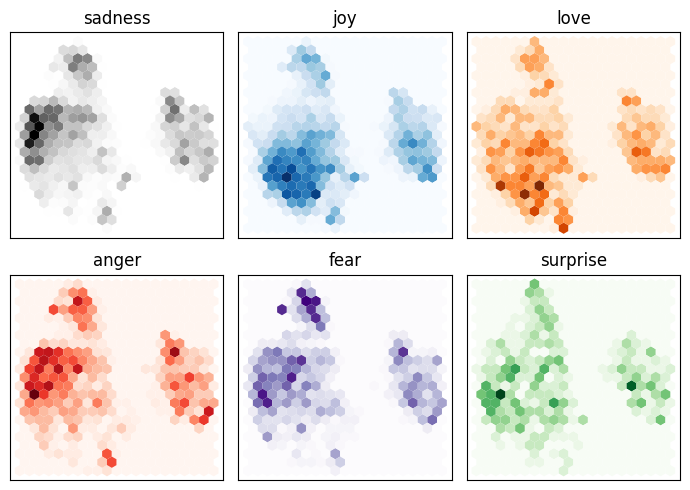

In [45]:
figs,axes = plt.subplots(2,3,figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys","Blues","Oranges","Reds","Purples","Greens"]
labels = emotions["train"].features["label"].names
for i, (label,cmap) in enumerate(zip(labels,cmaps)):
    df_emb_sub = df_emb.query(f"label=={i}")
    axes[i].hexbin(df_emb_sub["X"],df_emb_sub["Y"],cmap=cmap,gridsize=20,linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]),axes[i].set_yticks([])
plt.tight_layout()
plt.show()

In [46]:
#evaluating the model accuracy
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(x_train,y_train)
lr_clf.score(x_valid,y_valid)

0.632

In [47]:
#basic heuristic
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train,y_train)
dummy_clf.score(x_valid,y_valid)

0.352

In [48]:
#now we test the classifier prediction by checking the conclusinmatrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def plot_confusion_matrix(y_preds,y_true,labels):
    cm = confusion_matrix(y_true,y_preds,normalize="true")
    fig,ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot(cmap="Blues",values_format=".2f",ax=ax,colorbar=False)
    plt.title("Normalised confusion matrix")
    plt.show()

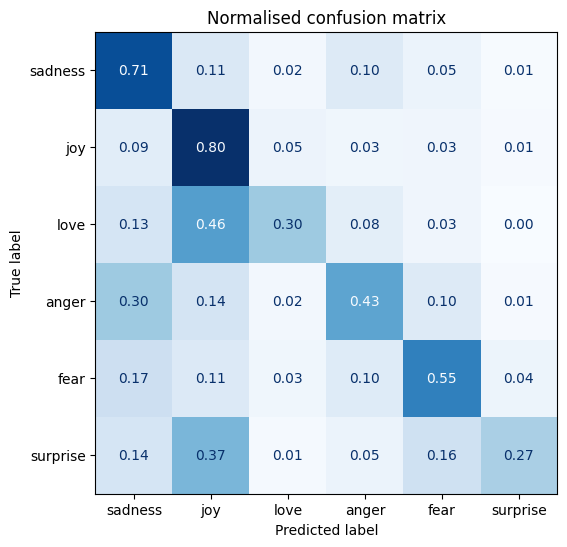

In [49]:
y_preds = lr_clf.predict(x_valid)
plot_confusion_matrix(y_preds,y_valid,labels)

In [50]:
from transformers import AutoModelForSequenceClassification

In [51]:
#load the pretrained data and classifier using AutoModelSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
from sklearn.metrics import f1_score, accuracy_score

In [53]:
#develop a prediction metrics evaluation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels,preds,average="weighted")
    acc = accuracy_score(labels,preds)
    return {"accuracy":acc, "f1":f1}

In [54]:
#login to huggingface
from huggingface_hub import notebook_login

In [58]:
notebook_login()


In [59]:
from transformers import Trainer,TrainingArguments
batch_size = 64
lr = 2e-5
logging_steps = len(emotions_encoded["train"])//batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=lr,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [60]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args,
                    compute_metrics=compute_metrics,
                    train_dataset=emotions_encoded["train"],
                    eval_dataset=emotions_encoded["validation"],
                    tokenizer=tokenizer)
trainer.train()

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

TrainOutput(global_step=500, training_loss=0.5429985961914062, metrics={'train_runtime': 746.5655, 'train_samples_per_second': 42.863, 'train_steps_per_second': 0.67, 'train_loss': 0.5429985961914062, 'epoch': 2.0})

In [61]:
pred_output =trainer.predict(emotions_encoded["validation"])


  0%|          | 0/32 [00:00<?, ?it/s]

In [62]:
pred_output.metrics

{'test_loss': 0.2241288423538208,
 'test_accuracy': 0.9185,
 'test_f1': 0.9187142100116431,
 'test_runtime': 11.119,
 'test_samples_per_second': 179.872,
 'test_steps_per_second': 2.878}

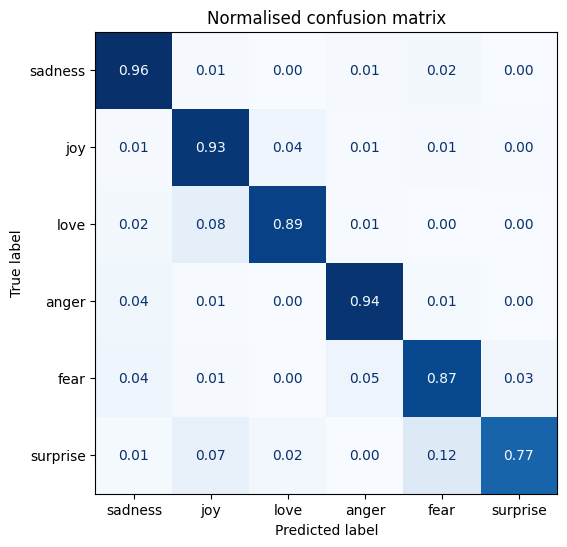

In [65]:
#to decode the raw predictions for all classes we will use np.argmax()
y_preds = np.argmax(pred_output.predictions,axis=1)
#plot the confusion matrix
plot_confusion_matrix(y_preds,y_valid,labels)

In [66]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
    #all tensors to device memory
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        outputs=model(**inputs)
        pred_label = torch.argmax(outputs.logits,axis=1)
        loss = cross_entropy(outputs.logits,batch["label"].to(device),reduction="none")
    #put all outputs in CPU
    return {"loss":loss.cpu().numpy(),
            "predicted_label":pred_label.cpu().numpy()}

In [67]:
emotions_encoded.set_format("torch",columns=["input_ids","attention_mask","label"])
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label,batched=True,batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [68]:
#give our predicted labels a dataframe so we can evaluate losses
emotions_encoded.set_format("pandas")
cols = ["text","label","predicted_label","loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [69]:
df_test.sort_values("loss",ascending=False).head(20)

,text,label,predicted_label,loss
1801,i feel that he was being overshadowed by the s...,love,sadness,5.562854
1963,i called myself pro life and voted for perry w...,joy,sadness,5.374621
1509,i guess this is a memoir so it feels like that...,joy,fear,5.152606
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.150376
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.115602
1950,i as representative of everything thats wrong ...,surprise,sadness,4.936259
405,i have been feeling extraordinarily indecisive...,fear,joy,4.925012
177,im sure much of the advantage is psychological...,sadness,joy,4.863934
1683,i had applied for a job and they had assured m...,anger,joy,4.841298
1111,im lazy my characters fall into categories of ...,joy,fear,4.738836


In [70]:
#check models witht the smallest loss
df_test.sort_values("loss",ascending=True).head(20)

,text,label,predicted_label,loss
244,im kinda relieve but at the same time i feel d...,sadness,sadness,0.019324
1368,i started this blog with pure intentions i mus...,sadness,sadness,0.019404
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.019420
69,i have no extra money im worried all of the ti...,sadness,sadness,0.019480
1861,im tired of feeling lethargic hating to work o...,sadness,sadness,0.019639
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.019698
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.019795
133,i and feel quite ungrateful for it but i m loo...,sadness,sadness,0.019835
1873,i feel practically virtuous this month i have ...,joy,joy,0.019918
1310,i feel like an ungrateful asshole,sadness,sadness,0.019963


In [71]:
#We save the model we created on the hugging face hub
trainer.push_to_hub(commit_message="training completed")


'https://huggingface.co/Emmanuelalo52/distilbert-base-uncased-finetuned-emotion/tree/main/'

In [72]:
from transformers import pipeline 
#change 'transformersbook' to "your notebook"
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification",model=model_id)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hp\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [73]:
#testing on live and unlabeled tweet
custom_tweet = "I got admitted to the school of my dream, I'm excited"
preds = classifier(custom_tweet,return_all_scores=True)


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\pipelines\text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


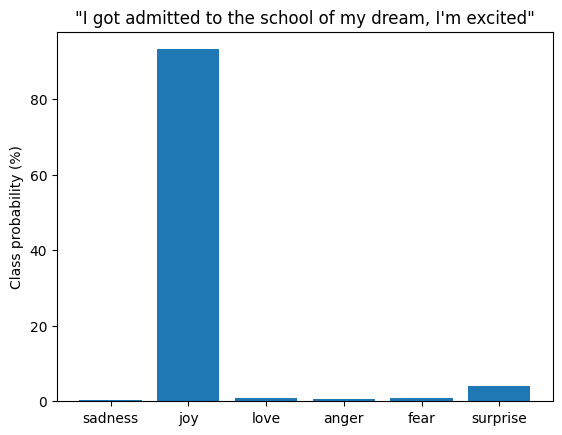

In [75]:
#plot the graph to show the writers emotion
pred_df = pd.DataFrame(preds[0])
plt.bar(labels,100*pred_df["score"],color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()